### Reading the image

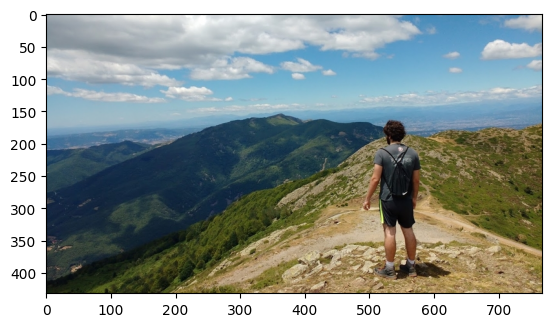

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('hw3_1.jpeg')
plt.imshow(img)

### Converting image to numpy array

In [2]:
import numpy as np

np_img = np.asarray(img)
rows = np_img.shape[0]
cols = np_img.shape[1] 
np_img.shape

(432, 768, 3)

In [3]:
img_split = np.dsplit(np_img, 3)
r = img_split[0]
g = img_split[1]
b = img_split[2]

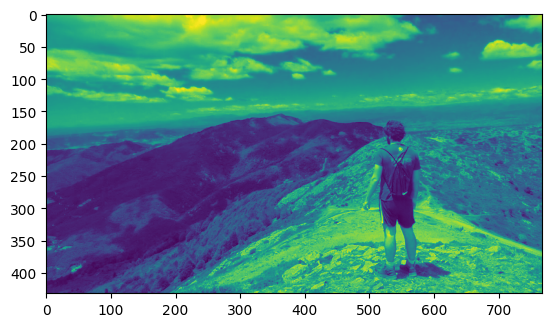

In [4]:
plt.imshow(r.reshape(432, 768))

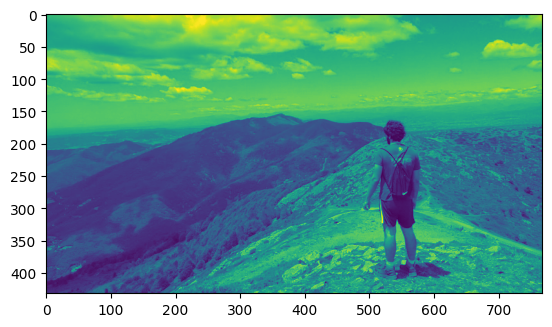

In [5]:
plt.imshow(g.reshape(432, 768))

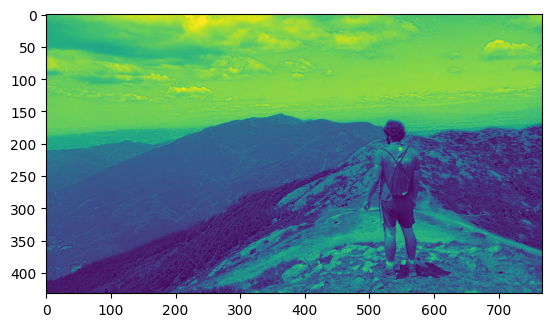

In [6]:
plt.imshow(b.reshape(432, 768))

### PCA function

In [7]:
def PCA_img(img, k):

    # Standardizing the image
    mu = np.mean(img, axis = 0)             # Mean
    sigma = np.std(img, axis = 0)           # Variance
    img_std = (img - mu)/sigma              # Standardized image

    # Covariance matrix
    cov_mat = np.cov(np.reshape(img_std, (rows, cols)).T)

    # Calculating the eigenvectors and eigenvalues
    vals, vecs = np.linalg.eigh(cov_mat)
    order = np.argsort(vals)[::-1]          # Sorting the eigenvalues in decreasing order
    vals = vals[order]                      # Setting the eigenvalues in order
    vecs = vecs[:, order]                   # setting the eigenvectors in order

    # Select the parameters
    vecs_k = vecs[:, :k]                    # Selecting eigenvectors for k highest eigenvalues
    proj_mat = np.dot(vecs_k, vecs_k.T)

    # Reconstructing the image
    img_reduced = np.dot(np.reshape(img_std, (rows, cols)), proj_mat)

    return (img_reduced, vals)

In [8]:
def reconstruct(r, g, b, k):

    r_reduced, rvals = PCA_img(r, k)
    g_reduced, gvals = PCA_img(g, k)
    b_reduced, bvals = PCA_img(b, k)

    img_recreated = np.dstack((r_reduced, g_reduced, b_reduced))
    return (img_recreated, [rvals, gvals, bvals])

### Results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


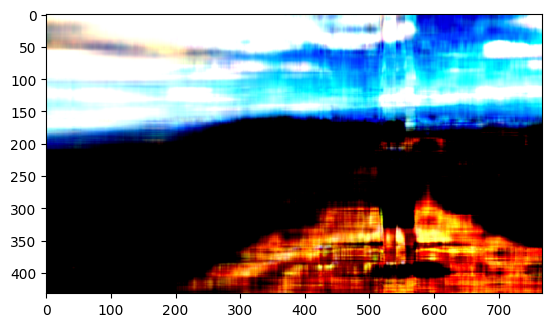

In [9]:
plt.imshow(reconstruct(r, g, b, 10)[0]) # 10 PCs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


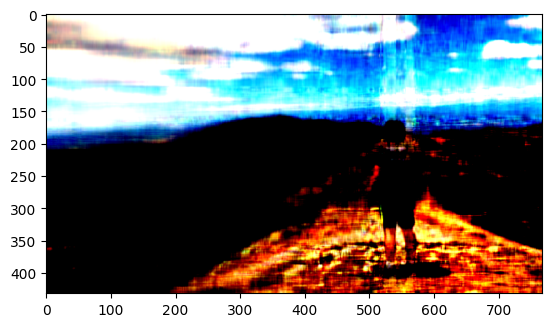

In [10]:
plt.imshow(reconstruct(r, g, b, 20)[0]) # 20 PCs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


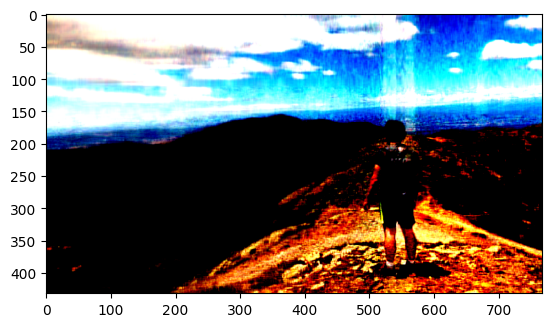

In [11]:
plt.imshow(reconstruct(r, g, b, 50)[0]) # 50 PCs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


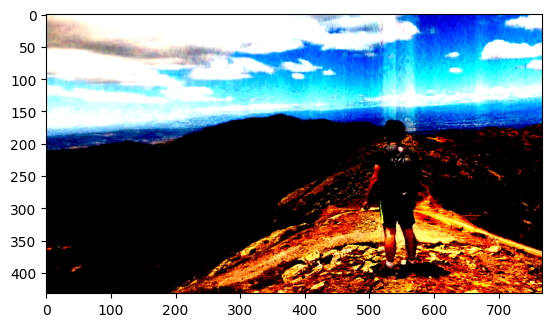

In [12]:
plt.imshow(reconstruct(r, g, b, 100)[0]) # 100 PCs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


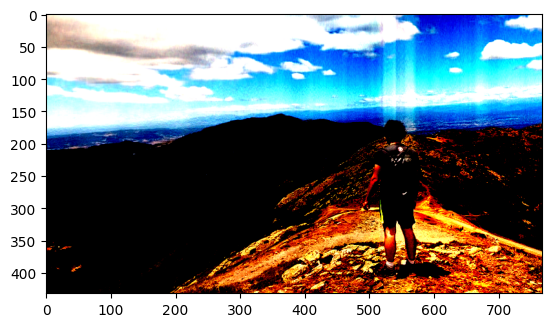

In [13]:
plt.imshow(reconstruct(r, g, b, 200)[0]) # 200 PCs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


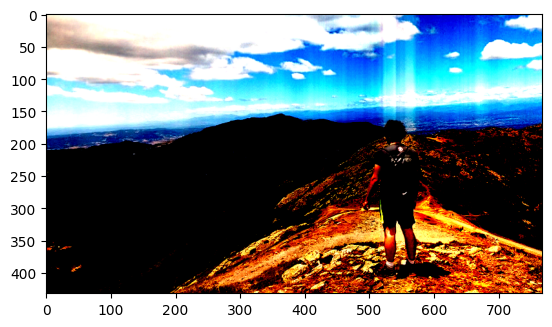

In [14]:
plt.imshow(reconstruct(r, g, b, 300)[0]) # 300 PCs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


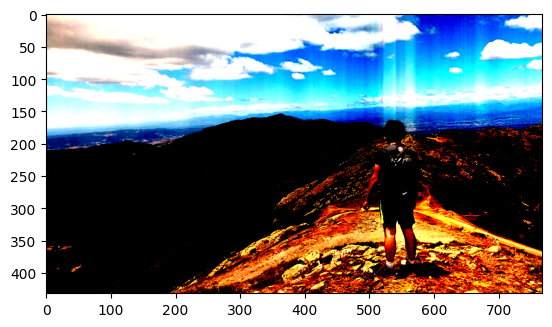

In [15]:
plt.imshow(reconstruct(r, g, b, 500)[0]) # 500 PCs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


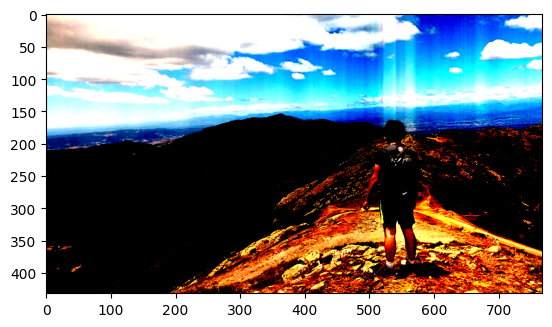

In [16]:
plt.imshow(reconstruct(r, g, b, np_img.shape[1])[0]) # All PCs

### Looking at variance captured

In [17]:
v = reconstruct(r, g, b, np_img.shape[1])[1]

rst = np.sum(v[0])
rds = {}
rs = 0
for i in range(np_img.shape[1]):
    rs += v[0][i]
    rds[i+1] = (rs/rst)*100

gst = np.sum(v[0])
gds = {}
gs = 0
for i in range(np_img.shape[1]):
    gs += v[1][i]
    gds[i+1] = (gs/gst)*100

bst = np.sum(v[2])
bds = {}
bs = 0
for i in range(np_img.shape[1]):
    bs += v[2][i]
    bds[i+1] = (bs/bst)*100

avgv = {}
for i in range(np_img.shape[1]):
    avgv[i+1] = (rds[i+1] + gds[i+1] + bds[i+1])/3

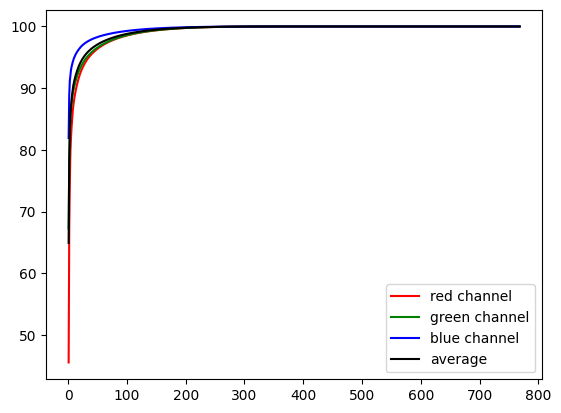

In [19]:
plt.figure()
plt.plot(list(rds.keys()), list(rds.values()), color = 'r', label = 'red channel')
plt.plot(list(gds.keys()), list(gds.values()), color = 'g', label = 'green channel')
plt.plot(list(bds.keys()), list(bds.values()), color = 'b', label = 'blue channel')
plt.plot(list(avgv.keys()), list(avgv.values()), color = 'k', label = 'average')
plt.legend()
plt.show()